In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from tqdm import tqdm
from tabulate import tabulate

sys.path.append(os.path.abspath('../..'))
from models import LogisticRegression, LogisticRegressionUndersampling, LogisticRegressionOversampling, LogisticRegressionSmote, LogisticRegressionCostReWeighting
from metrics import ClassificationMetrics
from data_splitting import train_val_split, cross_val
from fine_tuning import find_best_lambda
df = pd.read_csv('/home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP3/Problema_1/data/raw/breast_cancer_dev.csv')
df_test = pd.read_csv('/home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP3/Problema_1/data/raw/breast_cancer_test.csv')

In [2]:
X_test = df_test.drop(columns=['target'])
y_test = df_test['target']

## **Regresion without balancing. Finding best lambda for L2 regularization.**

Outer Iteration: 100%|██████████| 10/10 [00:03<00:00,  2.62iteration/s]


RESULTADOS DE F-SCORE PARA DISTINTOS LAMBDAS
╒══════════╤═══════════╕
│   Lambda │   F-Score │
╞══════════╪═══════════╡
│   0      │ 0.628584  │
├──────────┼───────────┤
│   0.0001 │ 0.634396  │
├──────────┼───────────┤
│   0.001  │ 0.622107  │
├──────────┼───────────┤
│   0.01   │ 0.648488  │
├──────────┼───────────┤
│   0.1    │ 0.639903  │
├──────────┼───────────┤
│   1      │ 0.608912  │
├──────────┼───────────┤
│  10      │ 0.319707  │
├──────────┼───────────┤
│ 100      │ 0.0183741 │
╘══════════╧═══════════╛
El mejor lambda es 0.01 con un f-score promedio de 0.6485


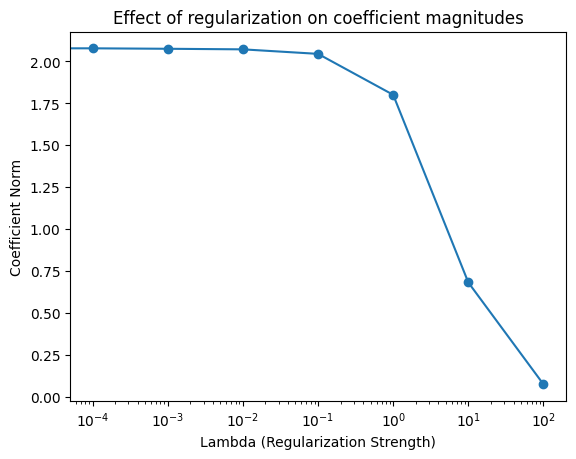

In [3]:
best_lambda_without_balancing = find_best_lambda(df, LogisticRegression, 0.245)

## **Logistic Regression with undersampling technique. Finding best lambda for L2 regularization.**

Outer Iteration:   0%|          | 0/10 [00:00<?, ?iteration/s]

Outer Iteration: 100%|██████████| 10/10 [00:03<00:00,  3.12iteration/s]


RESULTADOS DE F-SCORE PARA DISTINTOS LAMBDAS
╒══════════╤═══════════╕
│   Lambda │   F-Score │
╞══════════╪═══════════╡
│   0      │  0.75934  │
├──────────┼───────────┤
│   0.0001 │  0.771175 │
├──────────┼───────────┤
│   0.001  │  0.774944 │
├──────────┼───────────┤
│   0.01   │  0.766217 │
├──────────┼───────────┤
│   0.1    │  0.755231 │
├──────────┼───────────┤
│   1      │  0.759092 │
├──────────┼───────────┤
│  10      │  0.564979 │
├──────────┼───────────┤
│ 100      │  0.390707 │
╘══════════╧═══════════╛
El mejor lambda es 0.001 con un f-score promedio de 0.7749


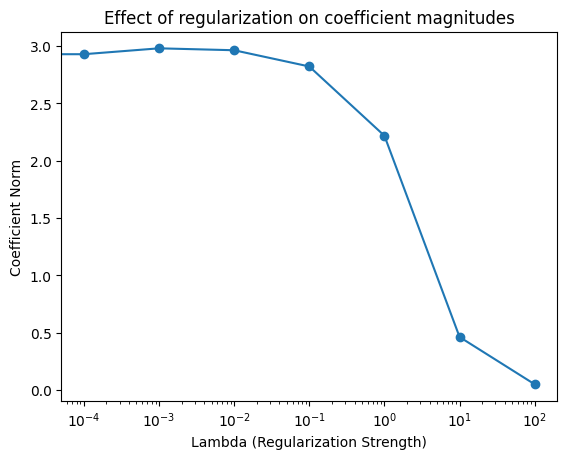

In [4]:
best_lambda_undersampling = find_best_lambda(df, LogisticRegressionUndersampling, 0.5, rebalancing_method=lambda model: model.undersampling())

## **Logistic Regression with oversampling technique. Finding best lambda for L2 regularization**

Outer Iteration: 100%|██████████| 10/10 [00:09<00:00,  1.08iteration/s]

RESULTADOS DE F-SCORE PARA DISTINTOS LAMBDAS
╒══════════╤═══════════╕
│   Lambda │   F-Score │
╞══════════╪═══════════╡
│   0      │  0.778324 │
├──────────┼───────────┤
│   0.0001 │  0.788576 │
├──────────┼───────────┤
│   0.001  │  0.772669 │
├──────────┼───────────┤
│   0.01   │  0.795422 │
├──────────┼───────────┤
│   0.1    │  0.781781 │
├──────────┼───────────┤
│   1      │  0.801857 │
├──────────┼───────────┤
│  10      │  0.76658  │
├──────────┼───────────┤
│ 100      │  0.552138 │
╘══════════╧═══════════╛
El mejor lambda es 1 con un f-score promedio de 0.8019


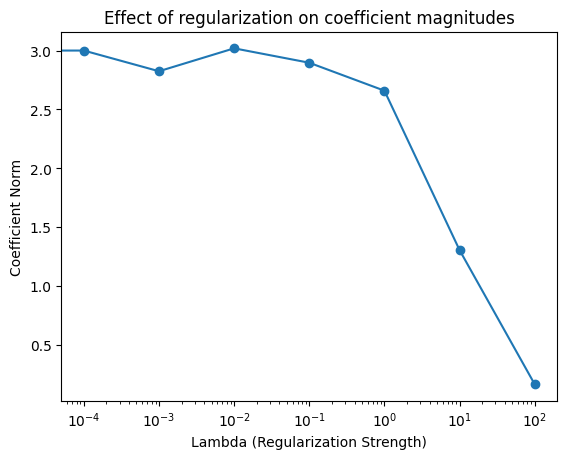

In [5]:
best_lambda_oversampling = find_best_lambda(df, LogisticRegressionOversampling, 0.5, rebalancing_method=lambda model: model.oversampling())

## **Logistic Regression with smote rebalancing technique. Finding best lambda for L2 regularization**

Outer Iteration: 100%|██████████| 10/10 [01:20<00:00,  8.08s/iteration]

RESULTADOS DE F-SCORE PARA DISTINTOS LAMBDAS
╒══════════╤═══════════╕
│   Lambda │   F-Score │
╞══════════╪═══════════╡
│   0      │  0.802911 │
├──────────┼───────────┤
│   0.0001 │  0.800625 │
├──────────┼───────────┤
│   0.001  │  0.798631 │
├──────────┼───────────┤
│   0.01   │  0.796542 │
├──────────┼───────────┤
│   0.1    │  0.792617 │
├──────────┼───────────┤
│   1      │  0.800931 │
├──────────┼───────────┤
│  10      │  0.786135 │
├──────────┼───────────┤
│ 100      │  0.444888 │
╘══════════╧═══════════╛
El mejor lambda es 0 con un f-score promedio de 0.8029


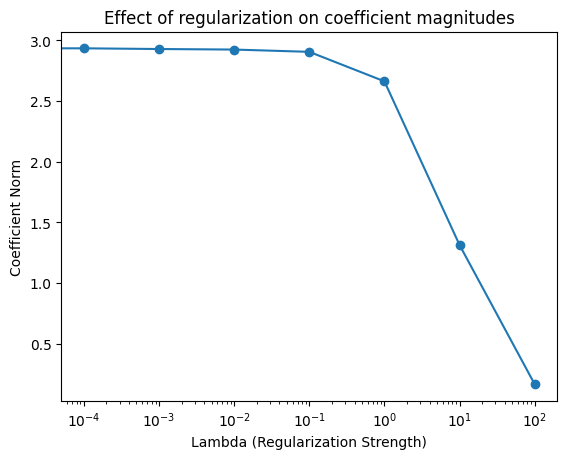

In [6]:
best_lambda_smote = find_best_lambda(df, LogisticRegressionSmote, 0.5, rebalancing_method=lambda model: model.smote())

## **Logistic Regression with cost reweighting. Finding best lambda for L2 regularization**

Outer Iteration: 100%|██████████| 10/10 [00:04<00:00,  2.39iteration/s]

RESULTADOS DE F-SCORE PARA DISTINTOS LAMBDAS
╒══════════╤═══════════╕
│   Lambda │   F-Score │
╞══════════╪═══════════╡
│   0      │ 0.623812  │
├──────────┼───────────┤
│   0.0001 │ 0.626389  │
├──────────┼───────────┤
│   0.001  │ 0.638473  │
├──────────┼───────────┤
│   0.01   │ 0.62686   │
├──────────┼───────────┤
│   0.1    │ 0.654804  │
├──────────┼───────────┤
│   1      │ 0.602568  │
├──────────┼───────────┤
│  10      │ 0.311725  │
├──────────┼───────────┤
│ 100      │ 0.0291663 │
╘══════════╧═══════════╛
El mejor lambda es 0.1 con un f-score promedio de 0.6548


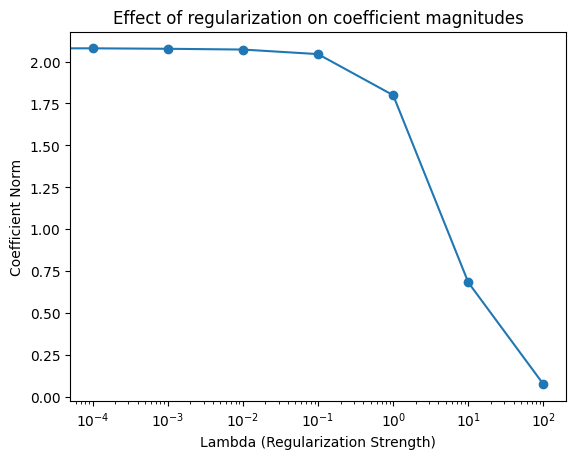

In [7]:
best_lambda_reweighting = find_best_lambda(df, LogisticRegressionCostReWeighting, 0.245)

## **Model training on full dev ser using the finded best lambda hiperparameter. Metric analysis on test set for the trained models.**

{'LogReg WithoutRebalancing': {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F-Score': 0, 'PR value': 0, 'ROC value': 0}, 'LogReg WithUndersampling': {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F-Score': 0, 'PR value': 0, 'ROC value': 0}, 'LogReg WithOversampling': {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F-Score': 0, 'PR value': 0, 'ROC value': 0}, 'LogReg WithSmote': {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F-Score': 0, 'PR value': 0, 'ROC value': 0}, 'LogReg WithCostReWeighting': {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F-Score': 0, 'PR value': 0, 'ROC value': 0}}
TP = 8, TN = 51, FP = 4, FN = 6
TP = 8, TN = 47, FP = 8, FN = 6
TP = 8, TN = 45, FP = 10, FN = 6
TP = 8, TN = 46, FP = 9, FN = 6
TP = 0, TN = 55, FP = 0, FN = 14
Metrics for LogReg WithoutRebalancing: 
{'Accuracy': 0.855072463768116, 'Precision': 0.6666666666666666, 'Recall': 0.5714285714285714, 'F-Score': 0.6153846153846153, 'PR value': 0.5125742483729394, 'ROC value': 0.8012987012987012}
Metrics for LogRe

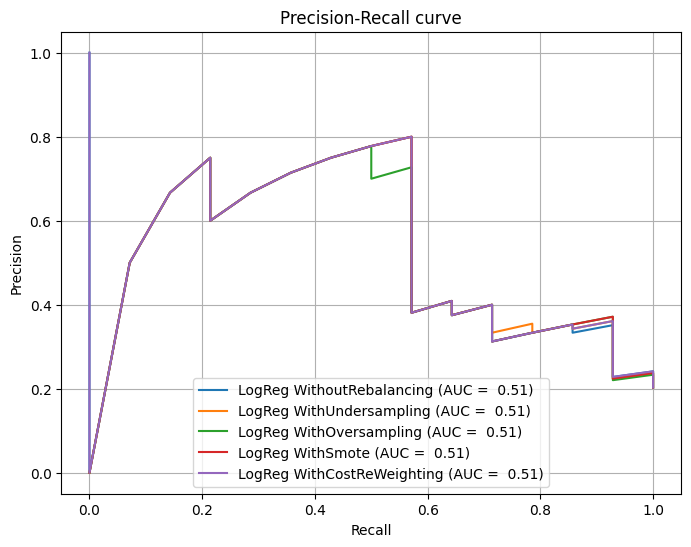

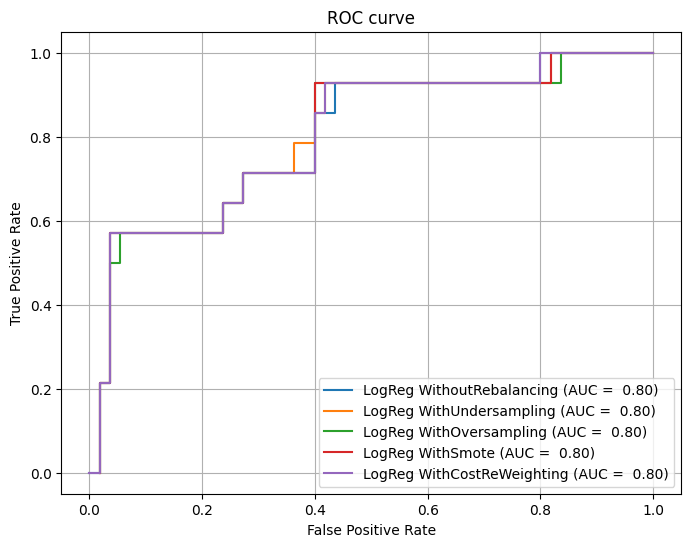

In [9]:
reg_without_balancing_best_lambda = LogisticRegression(
    df, threshold=0.245, max_iter=1000, learning_rate=0.1, lambda_penalty=best_lambda_without_balancing
)
reg_with_undersampling_best_lambda = LogisticRegressionUndersampling(
    df, threshold=0.5, max_iter=1000, learning_rate=0.1, lambda_penalty=best_lambda_undersampling
)
reg_with_oversampling_best_lambda = LogisticRegressionOversampling(
    df, threshold=0.5, max_iter=1000, learning_rate=0.1, lambda_penalty=best_lambda_oversampling
)
reg_with_smote_best_lambda = LogisticRegressionSmote(
    df, threshold=0.5, max_iter=1000, learning_rate=0.1, lambda_penalty=best_lambda_smote
)
reg_with_cost_re_weighting_best_lambda = LogisticRegressionCostReWeighting(
    df, threshold=0.5, max_iter=1000, learning_rate=0.1, lambda_penalty=best_lambda_reweighting
)

models = [reg_without_balancing_best_lambda, reg_with_undersampling_best_lambda,
          reg_with_oversampling_best_lambda, reg_with_smote_best_lambda,
          reg_with_cost_re_weighting_best_lambda]

model_names = ['LogReg WithoutRebalancing', 'LogReg WithUndersampling',
               'LogReg WithOversampling', 'LogReg WithSmote',
               'LogReg WithCostReWeighting']

precision_values_list = []
recall_values_list = []
auc_pr_values_list = []

false_positive_rate_values_list = []
true_positive_rate_values_list = []
auc_roc_value_list = []

metrics_for_each_model = {model_name : {'Accuracy': 0, 'Precision' : 0, 'Recall' : 0, 'F-Score' : 0, 'PR value' : 0, 'ROC value' : 0} for model_name in model_names}

print(metrics_for_each_model)
original_df = df

for model, name in zip(models, model_names):
    df = original_df.copy()
    if name == 'LogReg WithUndersampling':
        df = model.undersampling()

    elif name == 'LogReg WithOversampling':
        df = model.oversampling()

    elif name == 'LogReg WithSmote':
        df = model.smote()

    else:
        df = df

    X_train_full, y_train_full = df.drop(columns=['target']), df['target']
    model.fit(X_train_full, y_train_full)
    predicted_probs = model.predict_proba(X_test)
    predicted_targets = model.predict(X_test)

    metrics = ClassificationMetrics(y_test,
                                    predicted_targets,
                                    predicted_probs)

    confusion_matrix = metrics.confusion_matrix()
    accuracy = metrics.accuracy()
    precision = metrics.precision()
    recall = metrics.recall()
    f_score = metrics.f_score()
    recall_values, precision_values, auc_pr_value = metrics.auc_pr()
    recall_values_list.append(recall_values)
    precision_values_list.append(precision_values)
    auc_pr_values_list.append(auc_pr_value)
    tpr_values, fpr_values, auc_roc_value = metrics.auc_roc()
    true_positive_rate_values_list.append(tpr_values)
    false_positive_rate_values_list.append(fpr_values)
    auc_roc_value_list.append(auc_roc_value)

    metrics_for_each_model[name] = {
        'Accuracy' : accuracy,
        'Precision' : precision,
        'Recall' : recall,
        'F-Score' : f_score,
        'PR value' : auc_pr_value,
        'ROC value' : auc_roc_value
    }

for model_name, metrics_ in metrics_for_each_model.items():
    print(f'Metrics for {model_name}: ')
    print(metrics_)

metrics.plot_pr_curve(recall_values_list, precision_values_list, auc_pr_values_list, model_names)
metrics.plot_roc_curve(false_positive_rate_values_list, true_positive_rate_values_list, auc_roc_value_list, model_names)